--- Mongolian Tent Graph MT3,n for n=50 ---
Total Vertices (V): 151
Vertex Labels (Index = Label): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]

Calculated Edge Weights (Edge: Weight):
  Edge (0, 1): 1
  Edge (0, 2): 2
  Edge (0, 3): 3
  Edge (0, 4): 4
  Edge (0, 5): 5
  Edge (0, 6): 6
  Edge (0, 7): 7
  Edge (0, 8): 8
  Edge (0, 9): 9
  Edge (0, 10): 10
  Edge (0, 11): 11
  Edge (0, 12): 12
  Ed

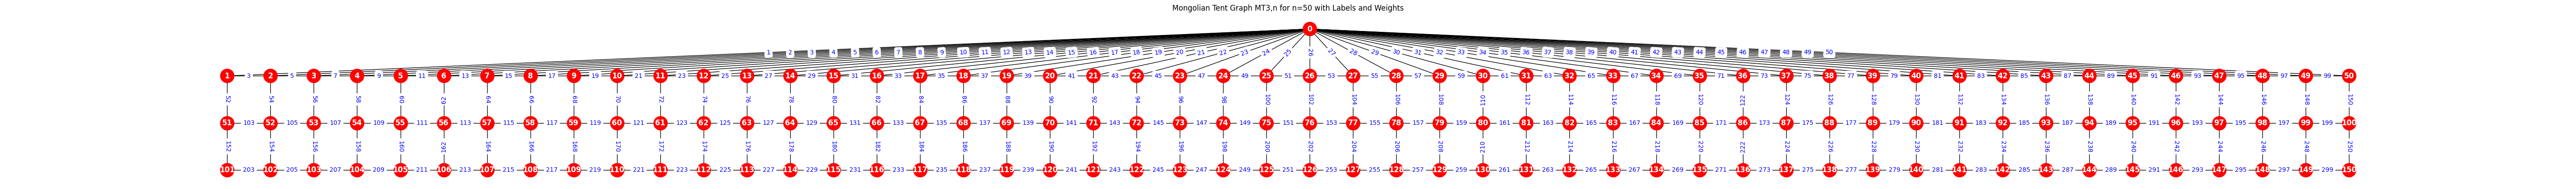

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_mt3n_labeled(n):
    """
    Generates the MT3,n graph with simple sequential vertex labels
    and calculates the induced edge weights (sum of vertex labels),
    returning a NetworkX graph object for visualization.
    """
    V = 3 * n + 1
    G = nx.Graph()

    # 1. Add Nodes with sequential labels (0 to 3n)
    G.add_nodes_from(range(V))

    # 2. Add Edges based on the MT3,n structure
    # Apex (0) to top row (1..n)
    for i in range(1, n + 1):
        G.add_edge(0, i)

    # Ladder graph structure
    for i in range(1, n + 1):
        # Vertical edges
        G.add_edge(i, i + n)
        G.add_edge(i + n, i + 2 * n)
        # Horizontal edges
        if i < n:
            G.add_edge(i, i + 1)
            G.add_edge(i + n, i + 1 + n)
            G.add_edge(i + 2 * n, i + 1 + 2 * n)

    # 3. Calculate and store edge weights as attributes
    for u, v in G.edges():
        weight = u + v # Simple sequential labels used for calculation
        G[u][v]['weight'] = weight

    return G

def draw_mt3n_graph(G, n):
    """
    Draws the NetworkX graph with node labels and edge weights,
    using a predefined layout to match the visual structure.
    """
    # Define positions manually to match the vertical/horizontal structure
    pos = {}
    # Apex position
    pos[0] = (n/2, 3)
    # Top row (y=2)
    for i in range(1, n + 1):
        pos[i] = (i-1, 2)
    # Middle row (y=1)
    for i in range(n + 1, 2 * n + 1):
        pos[i] = (i - n - 1, 1)
    # Bottom row (y=0)
    for i in range(2 * n + 1, 3 * n + 1):
        pos[i] = (i - 2 * n - 1, 0)

    # Extract edge weights for display
    edge_weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(n * 1.5, 5)) # Adjust figure size dynamically with n
    nx.draw_networkx_nodes(G, pos, node_color='red', node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color='black')
    nx.draw_networkx_labels(G, pos, font_color='white', font_weight='bold')
    # Draw edge weights
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_color='blue')

    plt.title(f"Mongolian Tent Graph MT3,n for n={n} with Labels and Weights")
    plt.axis('off') # Hide axis
    plt.show() # Display the graph window

# --- Main execution ---
n_val = 50

# 1. Generate the graph structure with weights embedded
graph = generate_mt3n_labeled(n_val)

# 2. Print the text output (as requested previously)
print(f"--- Mongolian Tent Graph MT3,n for n={n_val} ---")
print(f"Total Vertices (V): {len(graph.nodes())}")
print(f"Vertex Labels (Index = Label): {list(graph.nodes())}\n")
print("Calculated Edge Weights (Edge: Weight):")
sorted_weights = dict(sorted(nx.get_edge_attributes(graph, 'weight').items(), key=lambda item: item))
for edge, weight in sorted_weights.items():
    print(f"  Edge {edge}: {weight}")
print("\n--- Displaying Graphical Output ---")

# 3. Display the graphical representation
draw_mt3n_graph(graph, n_val)
